<a href="https://colab.research.google.com/github/saurabh7738/SaurabhPandey/blob/main/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import os
from google.colab import files

In [5]:
# Folder structure
project_name = "ds_SaurabhPandey"
os.makedirs(f"{project_name}/csv_files", exist_ok=True)
os.makedirs(f"{project_name}/outputs", exist_ok=True)

In [7]:
# UPLOAD CSV FILES
print("Upload both CSV files")
uploaded = files.upload()

for filename in uploaded.keys():
    os.rename(filename, f'/content/ds_SaurabhPandey/csv_files/{filename}')

Upload both CSV files


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [11]:
!mv csv_files/* ds_SaurabhPandey//csv_files/
!mv outputs/* ds_SaurabhPandey/outputs/
!mv notebook_1.ipynb ds_SaurabhPandey//

mv: cannot stat 'csv_files/*': No such file or directory
mv: cannot stat 'outputs/*': No such file or directory
mv: cannot stat 'notebook_1.ipynb': No such file or directory


In [13]:
# Load data
trader_df = pd.read_csv('/content/ds_SaurabhPandey/csv_files/historical_data.csv')
sentiment_df = pd.read_csv('/content/ds_SaurabhPandey/csv_files/fear_greed_index.csv')

In [14]:
trader_df.head(100)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0642,82.02,743.45,SELL,03-12-2024 15:22,4189.888602,Sell,101.447367,0x125ea070e5b6af24d28e04184f784a02018f001d1acb...,52209955900,True,0.260205,3.910000e+14,1.730000e+12
96,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0642,97.70,885.57,SELL,03-12-2024 15:22,4107.868602,Sell,120.841353,0x125ea070e5b6af24d28e04184f784a02018f001d1acb...,52209955900,True,0.309950,5.680000e+14,1.730000e+12
97,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0613,98.00,888.01,SELL,03-12-2024 15:22,4010.168602,Sell,120.928211,0x125ea070e5b6af24d28e04184f784a02018f001d1acb...,52209955900,True,0.310802,1.860000e+13,1.730000e+12
98,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0611,82.02,743.19,SELL,03-12-2024 15:22,3912.168602,Sell,101.193105,0x125ea070e5b6af24d28e04184f784a02018f001d1acb...,52209955900,True,0.260116,8.570000e+14,1.730000e+12


In [15]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [16]:
trader_df.columns = trader_df.columns.str.lower()
sentiment_df.columns = sentiment_df.columns.str.lower()

DATA Exploration And Summary


In [17]:
# TRADER DATA

print("\n=== Trader Data Overview ===")
print(trader_df.info())
print("\nMissing Values:\n", trader_df.isnull().sum())
print("\nDuplicates Removed:", trader_df.duplicated().sum())
trader_df.drop_duplicates(inplace=True)



=== Trader Data Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   coin              211224 non-null  object 
 2   execution price   211224 non-null  float64
 3   size tokens       211224 non-null  float64
 4   size usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp ist     211224 non-null  object 
 7   start position    211224 non-null  float64
 8   direction         211224 non-null  object 
 9   closed pnl        211224 non-null  float64
 10  transaction hash  211224 non-null  object 
 11  order id          211224 non-null  int64  
 12  crossed           211224 non-null  bool   
 13  fee               211224 non-null  float64
 14  trade id          211224 non-null  float64
 15  timestamp         211224 non-null  flo

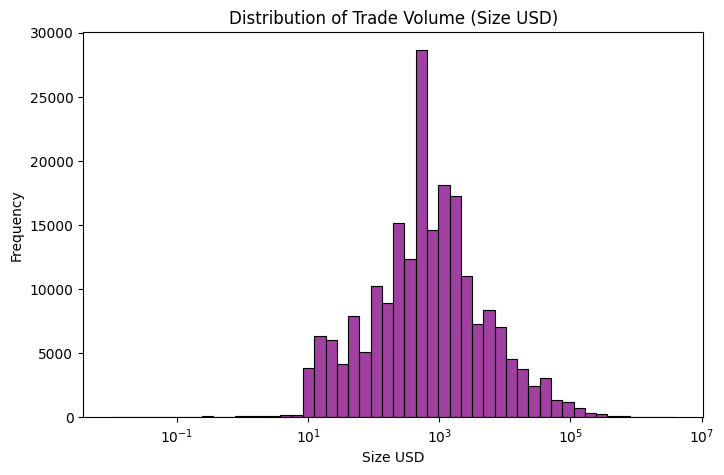

In [18]:
# Visualizations
plt.figure(figsize=(8,5))
sns.histplot(trader_df['size usd'], bins=50, color='purple', log_scale=True)
plt.title('Distribution of Trade Volume (Size USD)')
plt.xlabel('Size USD')
plt.ylabel('Frequency')
plt.show()

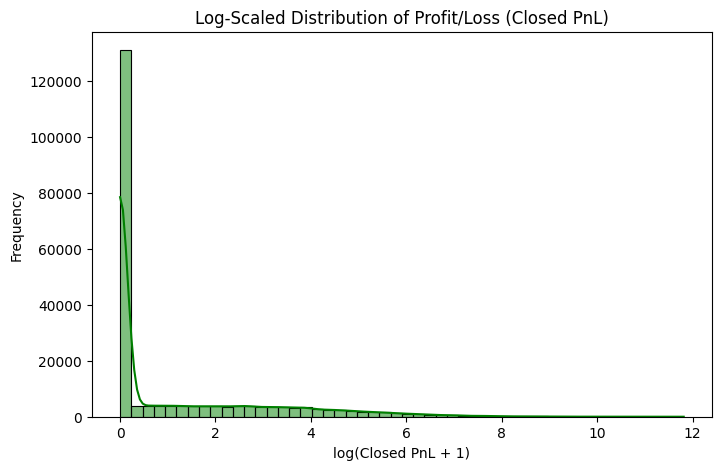

This compresses large values so we can see the distribution shape better.


In [19]:
import numpy as np

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(trader_df['closed pnl'].clip(lower=0)), bins=50, kde=True, color='green')
plt.title('Log-Scaled Distribution of Profit/Loss (Closed PnL)')
plt.xlabel('log(Closed PnL + 1)')
plt.ylabel('Frequency')
plt.show()
print("This compresses large values so we can see the distribution shape better.")


/tmp/ipython-input-20-2570755479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trader_df, x='side', palette='coolwarm')


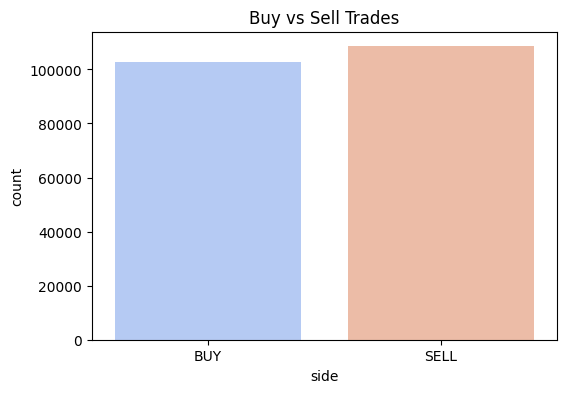

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=trader_df, x='side', palette='coolwarm')
plt.title('Buy vs Sell Trades')
plt.show()


In [21]:
#SENTIMENT DATA

print("\n=== Sentiment Data Overview ===")
print(sentiment_df.info())
print("\nMissing Values:\n", sentiment_df.isnull().sum())
print("\nDuplicates Removed:", sentiment_df.duplicated().sum())
sentiment_df.drop_duplicates(inplace=True)



=== Sentiment Data Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicates Removed: 0


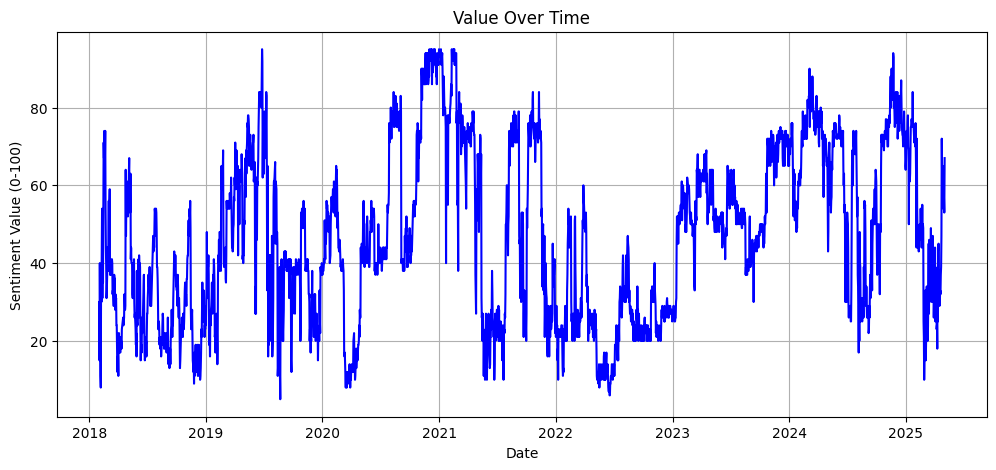

In [22]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
plt.figure(figsize=(12,5))
plt.plot(sentiment_df['date'], sentiment_df['value'], color='blue')
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value (0-100)')
plt.grid(True)
plt.show()

/tmp/ipython-input-23-1860368811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


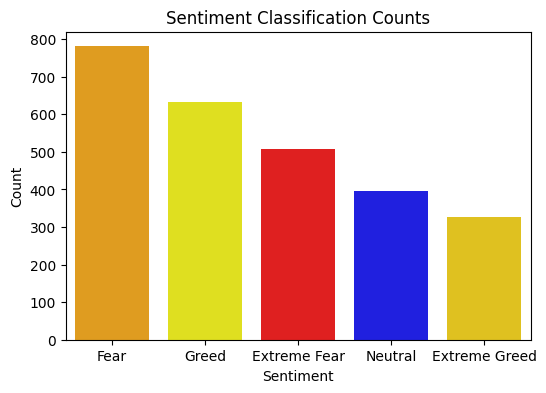

In [23]:
plt.figure(figsize=(6,4))
colors = ['orange', 'yellow', 'red', 'blue', 'gold']
sns.countplot(
    data=sentiment_df,
    x='classification',
    order=sentiment_df['classification'].value_counts().index,
    palette=colors
)
plt.title('Sentiment Classification Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [24]:
# Data prep for Analysis
trader_df['timestamp ist'] = pd.to_datetime(trader_df['timestamp ist'], errors='coerce', dayfirst=True)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')


In [25]:
trader_daily = trader_df.groupby(trader_df['timestamp ist'].dt.date).agg({
    'closed pnl': 'sum',
    'size usd': 'sum',
    'execution price': 'std'
}).reset_index()
trader_daily.columns = ['date', 'total_pnl', 'total_volume', 'price_risk']
trader_daily['date'] = pd.to_datetime(trader_daily['date'])

In [26]:
merged_df = pd.merge(trader_daily, sentiment_df[['date','value']], on='date', how='inner')
merged_df.rename(columns={'value': 'sentiment_score'}, inplace=True)

In [27]:
merged_df['sentiment_norm'] = (merged_df['sentiment_score'] - merged_df['sentiment_score'].min()) / \
                              (merged_df['sentiment_score'].max() - merged_df['sentiment_score'].min())

In [28]:
merged_df.head()

,date,total_pnl,total_volume,price_risk,sentiment_score,sentiment_norm
0,2023-05-01,0.000000,477.00,0.404145,63,0.630952
1,2023-12-05,0.000000,50005.83,17477.946554,75,0.773810
2,2023-12-14,-205.434737,113203.35,17176.671271,72,0.738095
3,2023-12-15,-24.632034,10609.95,0.000000,70,0.714286
4,2023-12-16,0.000000,15348.77,0.000029,67,0.678571


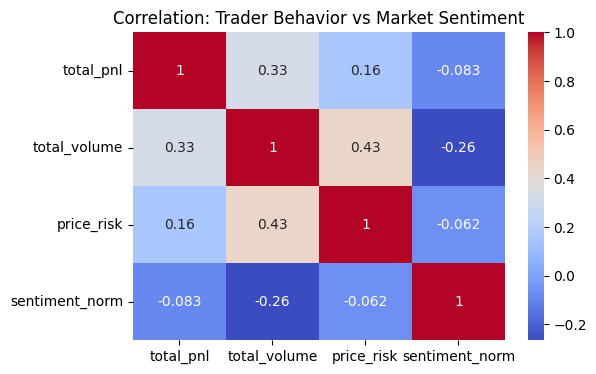

<Figure size 640x480 with 0 Axes>

In [29]:
#Correlation Analysis
corr = merged_df[['total_pnl','total_volume','price_risk','sentiment_norm']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation: Trader Behavior vs Market Sentiment")
plt.show()
plt.savefig('/content/ds_SaurabhPandey/outputs/correlation_heatmap.png')

In [30]:


# Handle NaNs before clustering
merged_df[['total_pnl', 'total_volume', 'price_risk']] = merged_df[['total_pnl', 'total_volume', 'price_risk']].fillna(0)

# Drop rows that still have missing values
merged_df.dropna(subset=['total_pnl', 'total_volume', 'price_risk'], inplace=True)

# Scale after cleaning
scaled = StandardScaler().fit_transform(merged_df[['total_pnl','total_volume','price_risk']])

In [31]:
!pip install kneed

ELBOW METHOD to find Optimal k


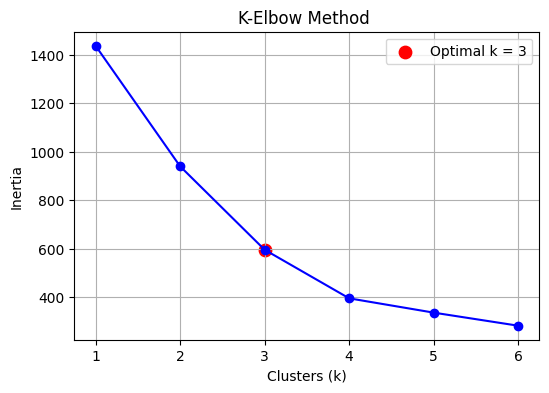

In [32]:
print("ELBOW METHOD to find Optimal k")
from kneed import KneeLocator
# Compute inertia for different K
inertias = []
K = range(1, 7)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled)
    inertias.append(km.inertia_)

# detect the elbow point
knee = KneeLocator(K, inertias, curve='convex', direction='decreasing')
optimal_k = knee.knee

# Plot
plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'bo-')
plt.scatter(optimal_k, inertias[optimal_k-1], color='red', s=80, label=f'Optimal k = {optimal_k}')
plt.xlabel('Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Elbow Method ')
plt.grid(True)
plt.legend()
plt.savefig('/content/ds_SaurabhPandey/outputs/k_elbow_auto.png', dpi=300)
plt.show()



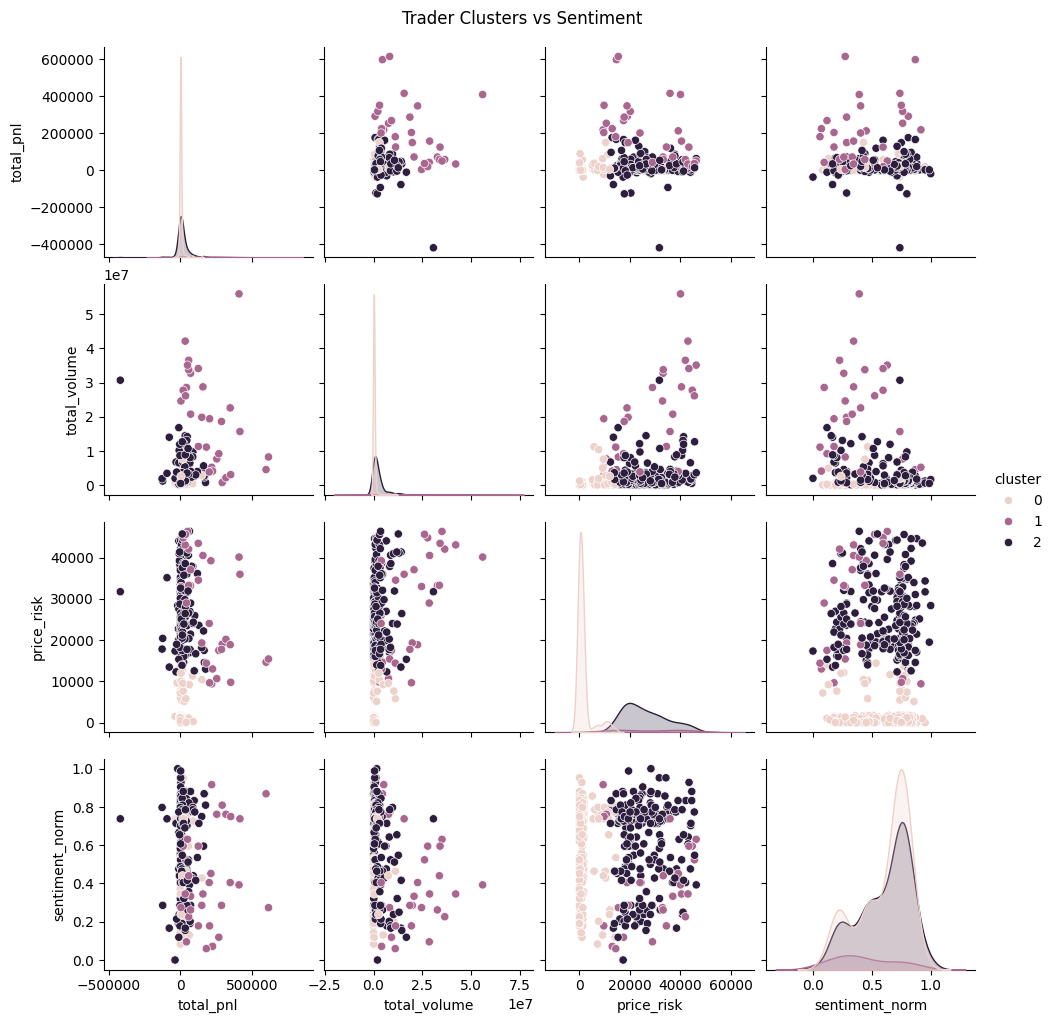

<Figure size 640x480 with 0 Axes>

In [33]:
# KMEANS CLUSTERING (k=3)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
merged_df['cluster'] = kmeans.fit_predict(scaled)

sns.pairplot(merged_df, hue='cluster', vars=['total_pnl','total_volume','price_risk','sentiment_norm'])
plt.suptitle('Trader Clusters vs Sentiment', y=1.02)
plt.show()
plt.savefig('/content/ds_SaurabhPandey/outputs/cluster_pairplot.png')

In [34]:
cluster_summary = merged_df.groupby('cluster').agg({
    'total_pnl': 'mean',
    'total_volume': 'mean',
    'price_risk': 'mean',
    'sentiment_norm': 'mean',
    'date': 'count'
}).rename(columns={'date': 'days_in_cluster'}).reset_index()

In [35]:
print("\nCluster Comparison")
print(cluster_summary)



Cluster Comparison
   cluster      total_pnl  total_volume    price_risk  sentiment_norm  \
0        0    4013.652690  3.481442e+05   1581.653429        0.606599   
1        1  207382.412701  1.929864e+07  27573.688237        0.431644   
2        2   13808.414770  2.458638e+06  26160.101655        0.608006   

   days_in_cluster  
0              241  
1               31  
2              207  


/tmp/ipython-input-36-608609537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='cluster', y=metric, ax=ax, palette='coolwarm')
/tmp/ipython-input-36-608609537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='cluster', y=metric, ax=ax, palette='coolwarm')
/tmp/ipython-input-36-608609537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='cluster', y=metric, ax=ax, palette='coolwarm')
/tmp/ipython-input-36-608609537.py:5: FutureWarning: 

Passing `palette` withou

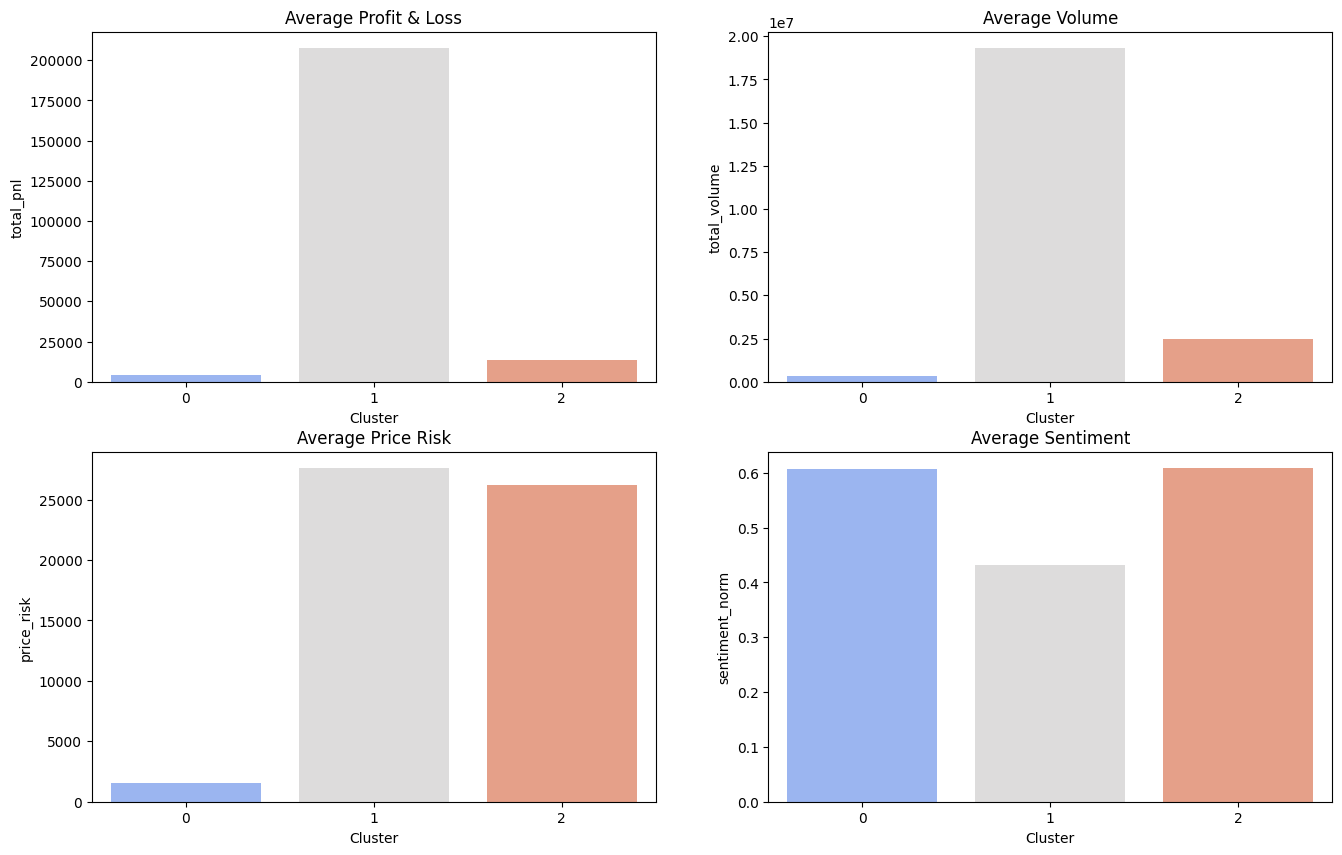

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
metrics = ['total_pnl', 'total_volume', 'price_risk', 'sentiment_norm']
titles = ['Average Profit & Loss', 'Average Volume', 'Average Price Risk', 'Average Sentiment']
for ax, metric, title in zip(axes.flatten(), metrics, titles):
    sns.barplot(data=cluster_summary, x='cluster', y=metric, ax=ax, palette='coolwarm')
    ax.set_title(title)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(metric)

In [37]:
plt.tight_layout()
plt.show()
fig.savefig('/content/ds_SaurabhPandey/outputs/cluster_comparison_bars.png')
cluster_summary.to_csv('/content/ds_SaurabhPandey/csv_files/cluster_summary.csv', index=False)

<Figure size 640x480 with 0 Axes>

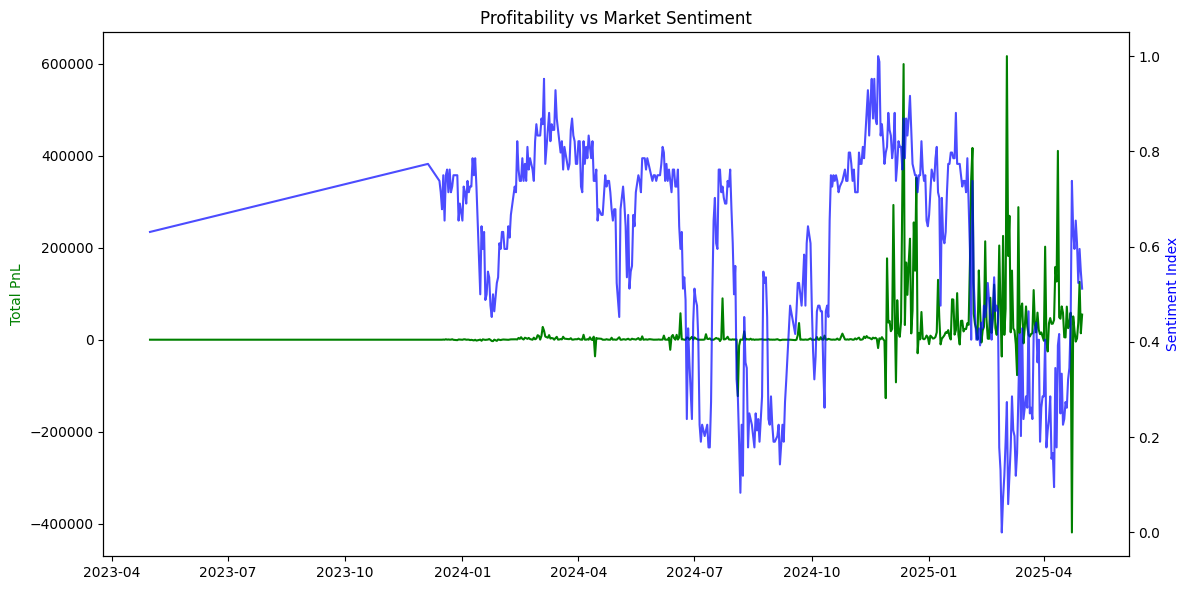

In [38]:
# Time series visualization 1 profitability vs Market Sentiment
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(merged_df['date'], merged_df['total_pnl'], color='green', label='Total PnL')
ax1.set_ylabel('Total PnL', color='green')
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['sentiment_norm'], color='blue', alpha=0.7)
ax2.set_ylabel('Sentiment Index', color='blue')
ax1.set_title('Profitability vs Market Sentiment')
fig.tight_layout()
plt.show()
fig.savefig('/content/ds_SaurabhPandey/outputs/time_series_pnl_sentiment.png')

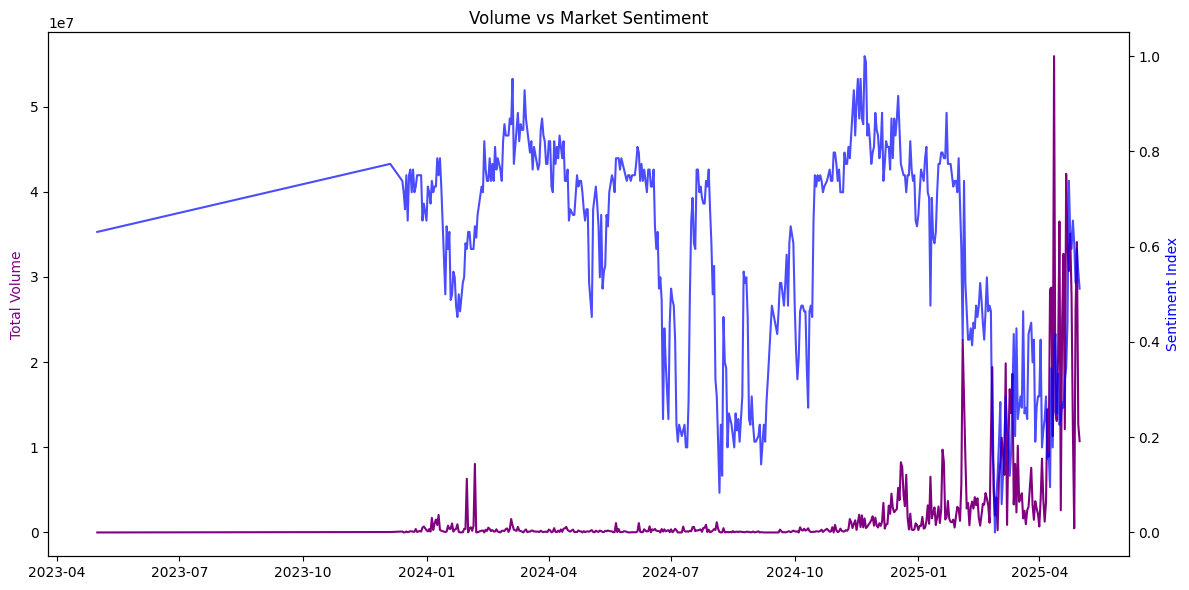

In [39]:
# Time series visualization 2 Volume vs Market Sentiment
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(merged_df['date'], merged_df['total_volume'], color='purple', label='Total Volume')
ax1.set_ylabel('Total Volume', color='purple')
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['sentiment_norm'], color='blue', alpha=0.7)
ax2.set_ylabel('Sentiment Index', color='blue')
ax1.set_title('Volume vs Market Sentiment')
fig.tight_layout()
plt.show()
fig.savefig('/content/ds_SaurabhPandey/outputs/time_series_volume_sentiment.png')


In [40]:
# Regression analysis
print("\n=== Regression Analysis: Predicting Total PnL ===")
reg_df = merged_df[['total_pnl', 'sentiment_norm', 'total_volume', 'price_risk']].dropna()
reg_df['sentiment_lag1'] = merged_df['sentiment_norm'].shift(1)
reg_df.dropna(inplace=True)

X = reg_df[['sentiment_norm', 'sentiment_lag1', 'total_volume', 'price_risk']]
y = reg_df['total_pnl']
X_sm = sm.add_constant(X)

model = sm.OLS(y, X_sm).fit()
print(model.summary())

reg_df['predicted_pnl'] = model.predict(X_sm)

mse = mean_squared_error(y, reg_df['predicted_pnl'])
r2 = r2_score(y, reg_df['predicted_pnl'])
print(f"\nModel Performance: MSE={mse:.2f}, R²={r2:.2f}")


=== Regression Analysis: Predicting Total PnL ===
                            OLS Regression Results                            
Dep. Variable:              total_pnl   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     14.57
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           3.14e-11
Time:                        18:52:38   Log-Likelihood:                -5996.1
No. Observations:                 478   AIC:                         1.200e+04
Df Residuals:                     473   BIC:                         1.202e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

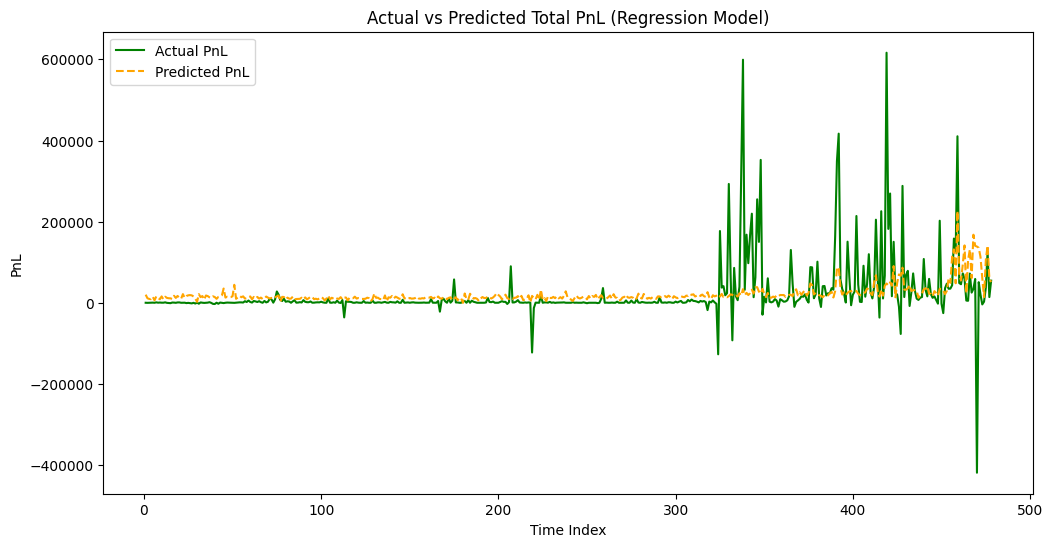

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize=(12,6))
plt.plot(reg_df.index, y, label='Actual PnL', color='green')
plt.plot(reg_df.index, reg_df['predicted_pnl'], label='Predicted PnL', color='orange', linestyle='--')
plt.title('Actual vs Predicted Total PnL (Regression Model)')
plt.xlabel('Time Index')
plt.ylabel('PnL')
plt.legend()
plt.show()
plt.savefig('/content/ds_SaurabhPandey/outputs/regression_actual_vs_predicted.png')

reg_df.to_csv('/content/ds_SaurabhPandey/csv_files/regression_results.csv', index=False)

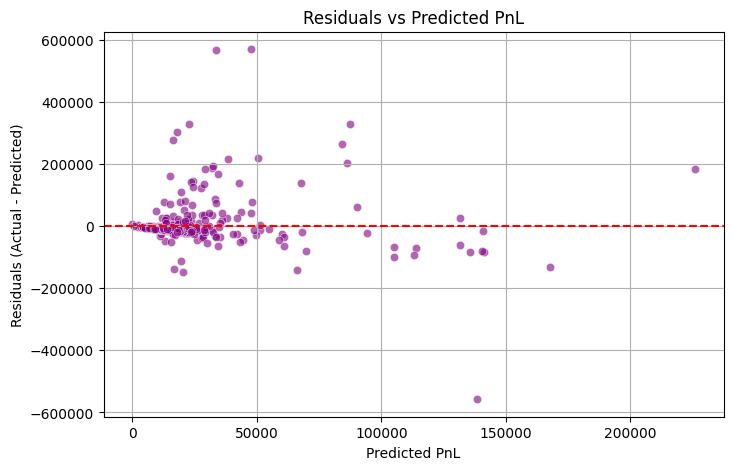

<Figure size 640x480 with 0 Axes>

In [42]:
# Residual Plot
residuals = y - reg_df['predicted_pnl']
plt.figure(figsize=(8,5))
sns.scatterplot(x=reg_df['predicted_pnl'], y=residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted PnL')
plt.xlabel('Predicted PnL')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()
plt.savefig('/content/ds_SaurabhPandey/outputs/regression_residuals.png')


In [43]:
#Insights
insights = []
corr_values = corr['sentiment_norm'].drop('sentiment_norm').sort_values(ascending=False)
top_metric = corr_values.index[0]
insights.append(f"Strongest correlation with market sentiment: {top_metric} (corr={corr_values.iloc[0]:.2f}).")

fear_periods = merged_df[merged_df['sentiment_score'] < 50]
greed_periods = merged_df[merged_df['sentiment_score'] >= 50]
avg_pnl_fear = fear_periods['total_pnl'].mean()
avg_pnl_greed = greed_periods['total_pnl'].mean()

if avg_pnl_fear > avg_pnl_greed:
    insights.append(f"Traders more profitable during FEAR (Avg PnL {avg_pnl_fear:.2f}) vs GREED ({avg_pnl_greed:.2f}).")
else:
    insights.append(f"Traders earn more during GREED (Avg PnL {avg_pnl_greed:.2f}) vs FEAR ({avg_pnl_fear:.2f}).")


In [44]:
merged_df['sentiment_next'] = merged_df['sentiment_norm'].shift(-1)
lead_corr = merged_df[['price_risk','sentiment_next']].corr().iloc[0,1]
if abs(lead_corr) > 0.3:
    insights.append(f"Price risk leads sentiment (corr={lead_corr:.2f}).")

print("\n=== Key Insights ===")
for line in insights:
    print("-", line)


=== Key Insights ===
- Strongest correlation with market sentiment: price_risk (corr=-0.06).
- Traders more profitable during FEAR (Avg PnL 37597.94) vs GREED (14988.82).


In [45]:
merged_df.to_csv('/content/ds_SaurabhPandey/csv_files/trader_sentiment_analysis.csv', index=False)
print("\n All outputs saved: CSVs in 'csv_files', plots & insights in 'outputs'.")


 All outputs saved: CSVs in 'csv_files', plots & insights in 'outputs'.
